In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict

In [51]:
### Importando librerías para clusterización jerárquica

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Importing dataset to cluster

In [4]:
df = pd.read_csv('df_to_model.csv')

In [29]:
df.drop(columns=['Unnamed: 0'], inplace=True)

### Reducción de variables mediante implementación de PCA (principal componente analysis)

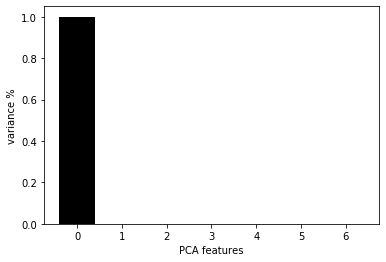

In [7]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Casi la totalidad de la varianza es explicada por tan solo una variable --> Cotización ETH / Dollar

In [9]:
pca.explained_variance_ratio_

array([9.99999311e-01, 1.71160013e-07, 1.55260073e-07, 1.38880714e-07,
       1.19410367e-07, 1.02714108e-07, 1.34761220e-09])

(0.99999, 1.0000001)

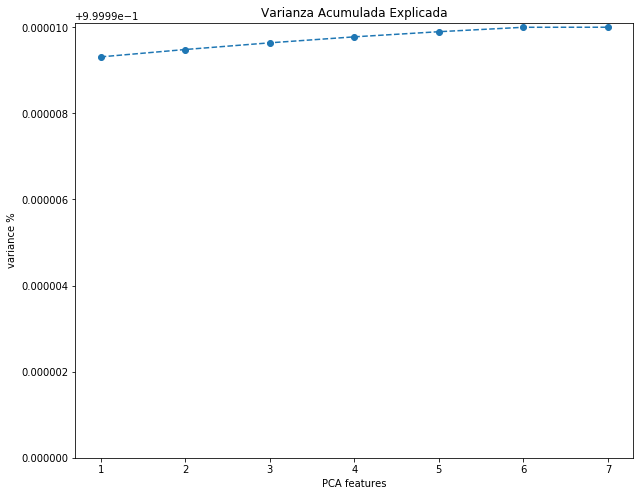

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title('Varianza Acumulada Explicada')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.ylim(0.99999,1.0000001)
#plt.xticks(features)
# Save components to a DataFrame


Se ha retocado la visualización de los ejes a modo de poder observar la progresión de la incorporación marginal de variables. Como la primera variable es tan significativa, la incorporación marginal de variables tiene un efecto muy sutil

##### El principal componente epxlica más del 99% de la varianza

In [25]:
print(pca.explained_variance_)

[7.26008728e+06 1.24263749e+00 1.12720246e+00 1.00828680e+00
 8.66930285e-01 7.45713903e-01 9.78378893e-03]


### Visualización de los dos principales componentes

Text(0, 0.5, 'PCA 2')

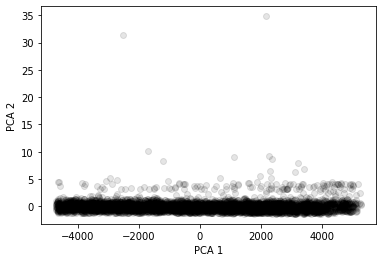

In [26]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Visualización de Codo

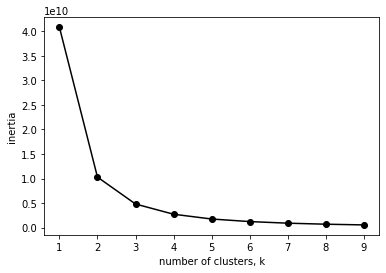

In [28]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [66]:
df

,human,rarity,traits_range,hidden_traits_range,amount_ethereum,Eth_to_$
0,1,-1.101525,-0.155689,-0.021788,0.036657,-1.354100
1,1,-0.287147,-0.155689,-0.021788,0.439641,-0.858939
2,1,-1.754706,-0.155689,-0.021788,-0.222403,-1.326415
3,1,0.860815,6.423055,-0.021788,-0.245316,-1.260539
4,1,-0.821091,-0.155689,-0.021788,0.002116,0.489623
...,...,...,...,...,...,...
5615,1,0.334564,-0.155689,-0.021788,-0.068694,0.526715
5616,1,-0.938929,-0.155689,-0.021788,-0.136050,-0.351391
5617,1,-1.060963,-0.155689,-0.021788,-0.233917,-1.322793
5618,1,0.835989,-0.155689,-0.021788,-0.179802,-0.211121


# Implementación de clusterización sin Variable de Cotización de ETH

In [31]:
df_reduced = df[['human', 'rarity', 'traits_range', 'hidden_traits_range', 'amount_ethereum']]

In [32]:
df_reduced

,human,rarity,traits_range,hidden_traits_range,amount_ethereum
0,1,-1.101525,-0.155689,-0.021788,0.036657
1,1,-0.287147,-0.155689,-0.021788,0.439641
2,1,-1.754706,-0.155689,-0.021788,-0.222403
3,1,0.860815,6.423055,-0.021788,-0.245316
4,1,-0.821091,-0.155689,-0.021788,0.002116
...,...,...,...,...,...
5615,1,0.334564,-0.155689,-0.021788,-0.068694
5616,1,-0.938929,-0.155689,-0.021788,-0.136050
5617,1,-1.060963,-0.155689,-0.021788,-0.233917
5618,1,0.835989,-0.155689,-0.021788,-0.179802


### Reducción de variables mediante implementación de PCA (principal componente analysis)

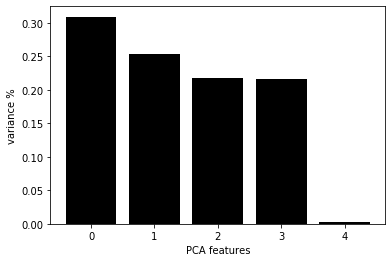

In [34]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_reduced)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Casi la totalidad de la varianza es explicada por tan solo una variable --> Cotización ETH / Dollar

In [35]:
pca.explained_variance_ratio_

array([0.30942423, 0.25335279, 0.21835826, 0.21640725, 0.00245748])

Text(0, 0.5, 'variance %')

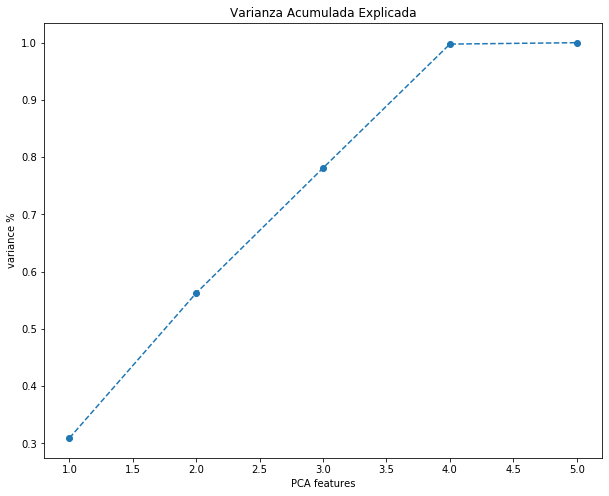

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title('Varianza Acumulada Explicada')
plt.xlabel('PCA features')
plt.ylabel('variance %')

#plt.xticks(features)
# Save components to a DataFrame


Se ha retocado la visualización de los ejes a modo de poder observar la progresión de la incorporación marginal de variables. Como la primera variable es tan significativa, la incorporación marginal de variables tiene un efecto muy sutil

##### El principal componente epxlica más del 99% de la varianza

In [40]:
print(pca.explained_variance_)

[1.24145516 1.01648837 0.8760852  0.86825746 0.00985978]


### Visualización de los dos principales componentes

Text(0, 0.5, 'PCA 2')

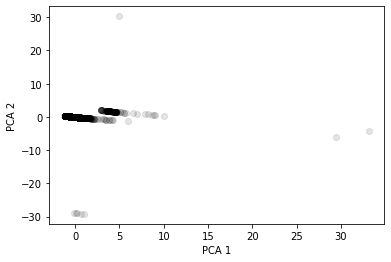

In [41]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Visualización de Codo

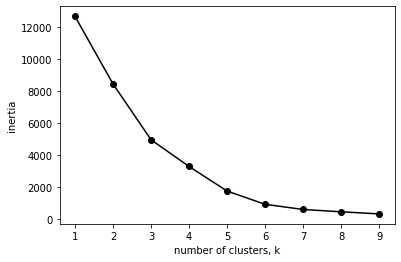

In [42]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

##### K = 5 pareciera ser el "codo" o "elbow" point. A partir de este punto, en principio no habrían cambios significativos en la expliación marginal de la varianza tras incorporar un Cluster adicional. Por este motivo la cantidad de Clusters óptima es de 4

# Clasificación de observaciones respecto a los 4 clusters posibles

In [45]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [46]:
kmeans_pca.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=5, random_state=42)

In [47]:
df_segm_pca_kmeans = pd.concat([PCA_components.iloc[:,:2].reset_index(drop = True), pd.DataFrame(PCA_components.iloc[:,:2])], axis = 1)
df_segm_pca_kmeans.columns = ['Componente 1', 'Componente 2', 'Componente1b', 'Componente2b']
df_segm_pca_kmeans.drop(columns=['Componente1b', 'Componente2b'], inplace=True, axis=1)

#Quizas tenga que eliminar Componente1b y 2b y quitar el drop


df_segm_pca_kmeans['Segmento K-Means PCA'] = kmeans_pca.labels_

In [48]:
df_segm_pca_kmeans

,Componente 1,Componente 2,Segmento K-Means PCA
0,0.569920,-0.209386,1
1,0.338438,-0.121271,1
2,0.793557,-0.287603,1
3,2.964509,1.938896,3
4,0.387628,-0.158666,1
...,...,...,...
5615,-0.321249,0.041938,0
5616,0.373858,-0.162027,1
5617,0.386361,-0.170824,1
5618,-0.676402,0.138429,0


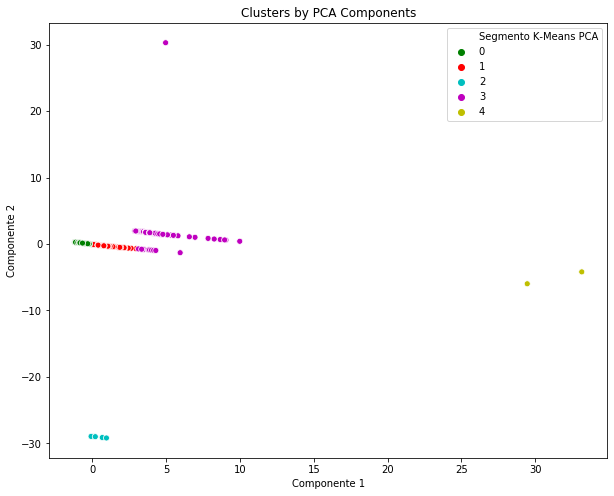

In [50]:
x_axis = df_segm_pca_kmeans['Componente 1']
y_axis = df_segm_pca_kmeans['Componente 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segmento K-Means PCA'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

# Clusterización jerárquica

In [52]:
hierarchical_data = PCA_components.iloc[:,:2]

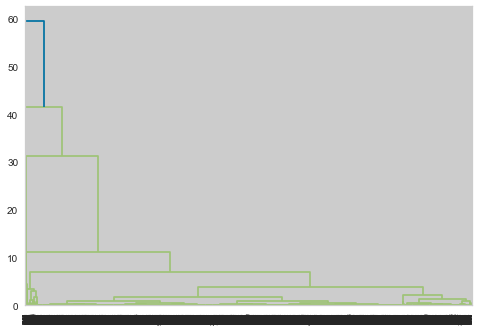

<Figure size 1728x1152 with 0 Axes>

In [65]:
# complete linkage
cl_mergings = linkage(hierarchical_data, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.figure(figsize=(24,16))
plt.show()

In [55]:
# the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage
# 4 clusters using complete linkage
cl_cluster_labels = pd.Series(cut_tree(cl_mergings, n_clusters=5).reshape(-1, ))
cl_cluster_labels

0       0
1       0
2       0
3       0
4       0
       ..
5615    0
5616    0
5617    0
5618    0
5619    0
Length: 5620, dtype: int32

In [56]:
pca_hierarchical = pd.concat([hierarchical_data.reset_index(drop = True), cl_cluster_labels], axis=1)
pca_hierarchical.columns = ["PC1","PC2","Segmento Hierarchical Cluster"]
pca_hierarchical.head()

,PC1,PC2,Segmento Hierarchical Cluster
0,0.569920,-0.209386,0
1,0.338438,-0.121271,0
2,0.793557,-0.287603,0
3,2.964509,1.938896,0
4,0.387628,-0.158666,0


### Visualización gráfica mediante clusterización jerárquica

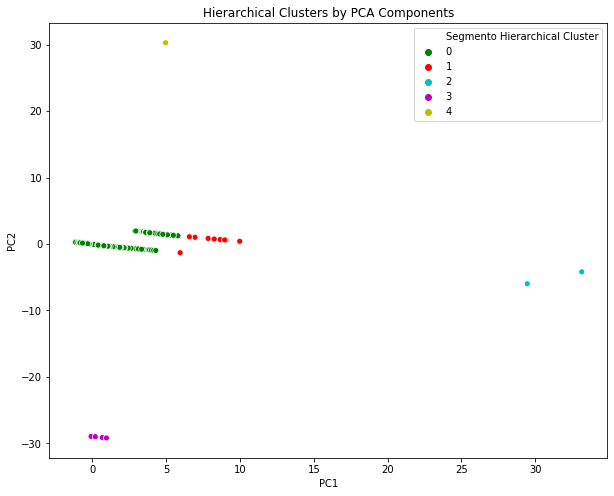

In [58]:
x_axis = pca_hierarchical['PC1']
y_axis = pca_hierarchical['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = pca_hierarchical['Segmento Hierarchical Cluster'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Hierarchical Clusters by PCA Components')
plt.show()

### Sillhouette

The average silhouette_score is :0.616015265995071


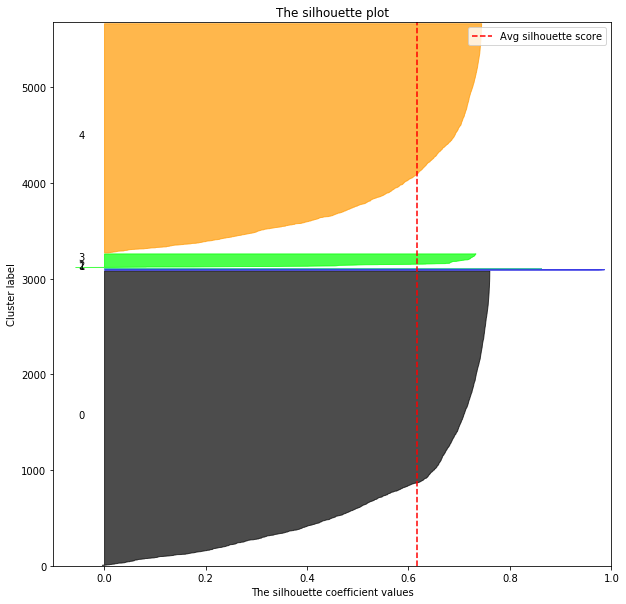

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n_clusters = 5
plt.figure(figsize = (10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0, len(PCA_components.iloc[:,:2]) + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
labels = clusterer.fit_predict(PCA_components.iloc[:,:2])
print("The average silhouette_score is :{}".format(silhouette_score(PCA_components.iloc[:,:2], labels)))
sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:2], labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(PCA_components.iloc[:,:2], labels), color="red", linestyle="--", label = "Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()

### Iteración de Sillhouette

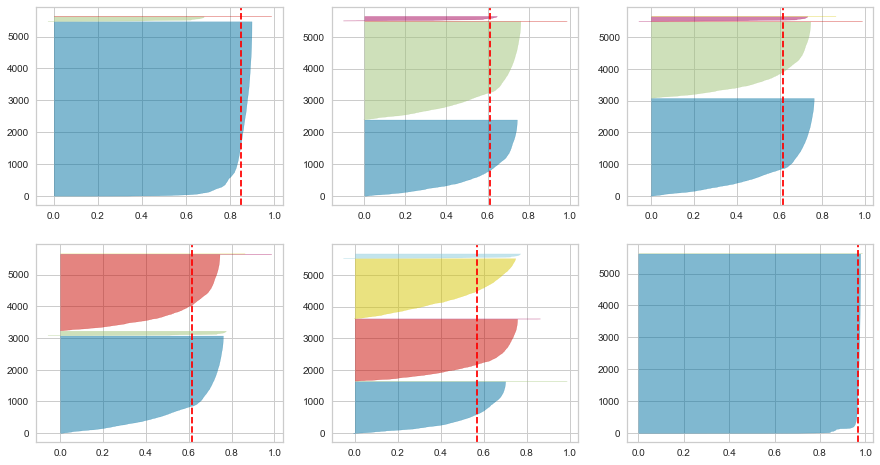

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_hierarchical)

# -------------------------------------------------------

# Implementación de clusterización con PCA = 4 y sin incluir ETH/$

In [31]:
df_reduced = df[['human', 'rarity', 'traits_range', 'hidden_traits_range', 'amount_ethereum']]

In [32]:
df_reduced

,human,rarity,traits_range,hidden_traits_range,amount_ethereum
0,1,-1.101525,-0.155689,-0.021788,0.036657
1,1,-0.287147,-0.155689,-0.021788,0.439641
2,1,-1.754706,-0.155689,-0.021788,-0.222403
3,1,0.860815,6.423055,-0.021788,-0.245316
4,1,-0.821091,-0.155689,-0.021788,0.002116
...,...,...,...,...,...
5615,1,0.334564,-0.155689,-0.021788,-0.068694
5616,1,-0.938929,-0.155689,-0.021788,-0.136050
5617,1,-1.060963,-0.155689,-0.021788,-0.233917
5618,1,0.835989,-0.155689,-0.021788,-0.179802


### Reducción de variables mediante implementación de PCA (principal componente analysis)

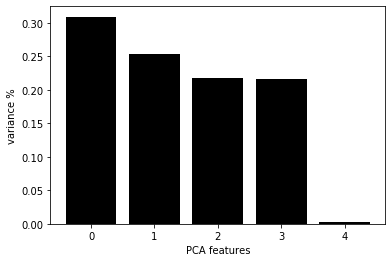

In [34]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_reduced)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Casi la totalidad de la varianza es explicada por tan solo una variable --> Cotización ETH / Dollar

In [35]:
pca.explained_variance_ratio_

array([0.30942423, 0.25335279, 0.21835826, 0.21640725, 0.00245748])

Text(0, 0.5, 'variance %')

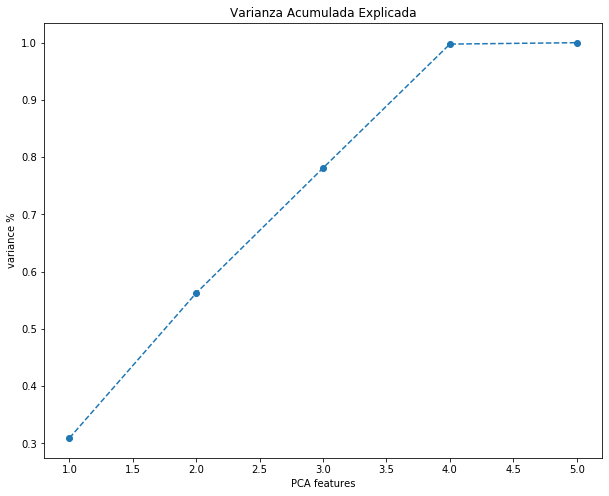

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title('Varianza Acumulada Explicada')
plt.xlabel('PCA features')
plt.ylabel('variance %')

#plt.xticks(features)
# Save components to a DataFrame


Se ha retocado la visualización de los ejes a modo de poder observar la progresión de la incorporación marginal de variables. Como la primera variable es tan significativa, la incorporación marginal de variables tiene un efecto muy sutil

##### El principal componente epxlica más del 99% de la varianza

In [40]:
print(pca.explained_variance_)

[1.24145516 1.01648837 0.8760852  0.86825746 0.00985978]


### Visualización de los dos principales componentes

Text(0, 0.5, 'PCA 2')

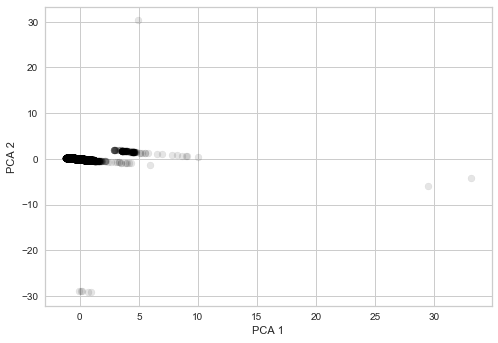

In [87]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 3')

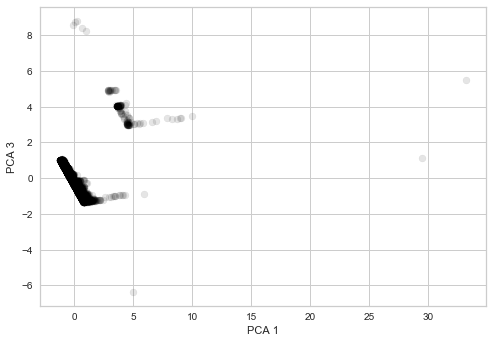

In [67]:
plt.scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

Text(0, 0.5, 'PCA 4')

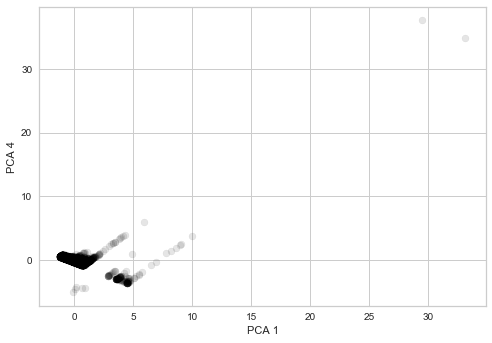

In [68]:
plt.scatter(PCA_components[0], PCA_components[3], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 4')

Text(0, 0.5, 'PCA 3')

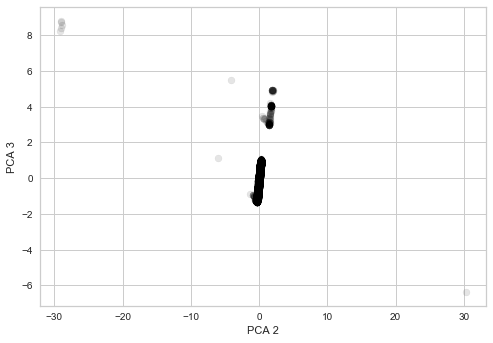

In [69]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')

### Visualización de Codo

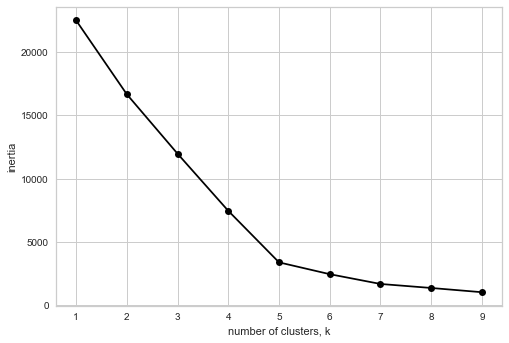

In [70]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

##### K = 5 pareciera ser el "codo" o "elbow" point. A partir de este punto, en principio no habrían cambios significativos en la expliación marginal de la varianza tras incorporar un Cluster adicional. Por este motivo la cantidad de Clusters óptima es de 4

# Clasificación de observaciones respecto a los 5 clusters posibles

In [45]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [71]:
kmeans_pca.fit(PCA_components.iloc[:,:4])

KMeans(n_clusters=5, random_state=42)

In [77]:
df_segm_pca_kmeans = pd.concat([PCA_components.iloc[:,:4].reset_index(drop = True), pd.DataFrame(PCA_components.iloc[:,:4])], axis = 1)
df_segm_pca_kmeans.columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente1b', 'Componente2b', 'Componente3b', 'Componente4b']
df_segm_pca_kmeans.drop(columns=['Componente1b', 'Componente2b', 'Componente3b', 'Componente4b'], inplace=True, axis=1)

#Quizas tenga que eliminar Componente1b y 2b y quitar el drop


df_segm_pca_kmeans['Segmento K-Means PCA'] = kmeans_pca.labels_

In [78]:
df_segm_pca_kmeans

,Componente 1,Componente 2,Componente 3,Componente 4,Segmento K-Means PCA
0,0.569920,-0.209386,-0.863182,-0.353683,3
1,0.338438,-0.121271,-0.283267,0.300501,3
2,0.793557,-0.287603,-1.324966,-0.827371,3
3,2.964509,1.938896,4.798579,-2.545595,1
4,0.387628,-0.158666,-0.672514,-0.266201,3
...,...,...,...,...,...
5615,-0.321249,0.041938,0.116943,0.151179,0
5616,0.373858,-0.162027,-0.760586,-0.424347,3
5617,0.386361,-0.170824,-0.849439,-0.552175,3
5618,-0.676402,0.138429,0.455292,0.268366,0


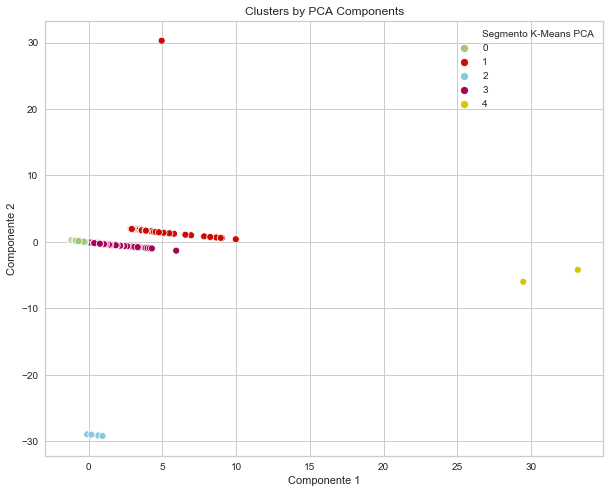

In [79]:
x_axis = df_segm_pca_kmeans['Componente 1']
y_axis = df_segm_pca_kmeans['Componente 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segmento K-Means PCA'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

# Clusterización jerárquica

In [80]:
hierarchical_data = PCA_components.iloc[:,:4]

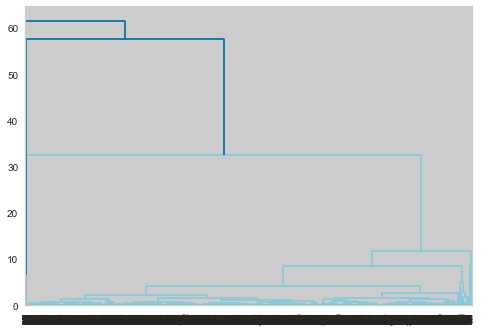

<Figure size 1728x1152 with 0 Axes>

In [81]:
# complete linkage
cl_mergings = linkage(hierarchical_data, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.figure(figsize=(24,16))
plt.show()

In [82]:
# the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage
# 4 clusters using complete linkage
cl_cluster_labels = pd.Series(cut_tree(cl_mergings, n_clusters=5).reshape(-1, ))
cl_cluster_labels

0       0
1       0
2       0
3       0
4       0
       ..
5615    0
5616    0
5617    0
5618    0
5619    0
Length: 5620, dtype: int32

In [83]:
pca_hierarchical = pd.concat([hierarchical_data.reset_index(drop = True), cl_cluster_labels], axis=1)
pca_hierarchical.columns = ["PC1","PC2", "PC3", "PC4","Segmento Hierarchical Cluster"]
pca_hierarchical.head()

,PC1,PC2,PC3,PC4,Segmento Hierarchical Cluster
0,0.569920,-0.209386,-0.863182,-0.353683,0
1,0.338438,-0.121271,-0.283267,0.300501,0
2,0.793557,-0.287603,-1.324966,-0.827371,0
3,2.964509,1.938896,4.798579,-2.545595,0
4,0.387628,-0.158666,-0.672514,-0.266201,0


### Visualización gráfica mediante clusterización jerárquica

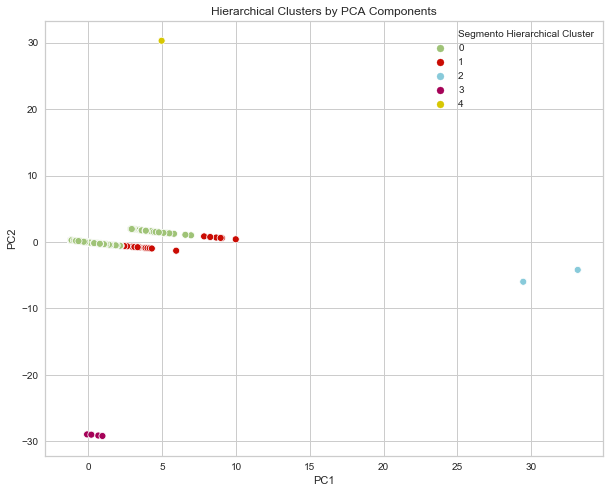

In [84]:
x_axis = pca_hierarchical['PC1']
y_axis = pca_hierarchical['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = pca_hierarchical['Segmento Hierarchical Cluster'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Hierarchical Clusters by PCA Components')
plt.show()

### Sillhouette

The average silhouette_score is :0.6021952218619733


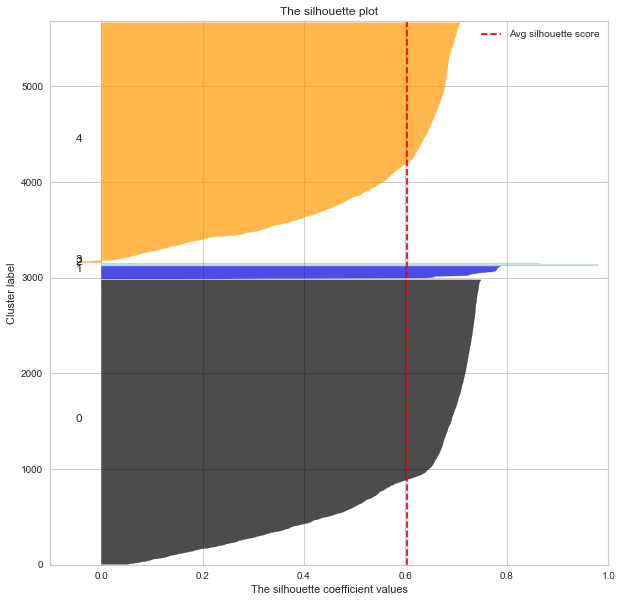

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n_clusters = 5
plt.figure(figsize = (10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0, len(PCA_components.iloc[:,:4]) + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
labels = clusterer.fit_predict(PCA_components.iloc[:,:4])
print("The average silhouette_score is :{}".format(silhouette_score(PCA_components.iloc[:,:2], labels)))
sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:4], labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(PCA_components.iloc[:,:2], labels), color="red", linestyle="--", label = "Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()

### Iteración de Sillhouette

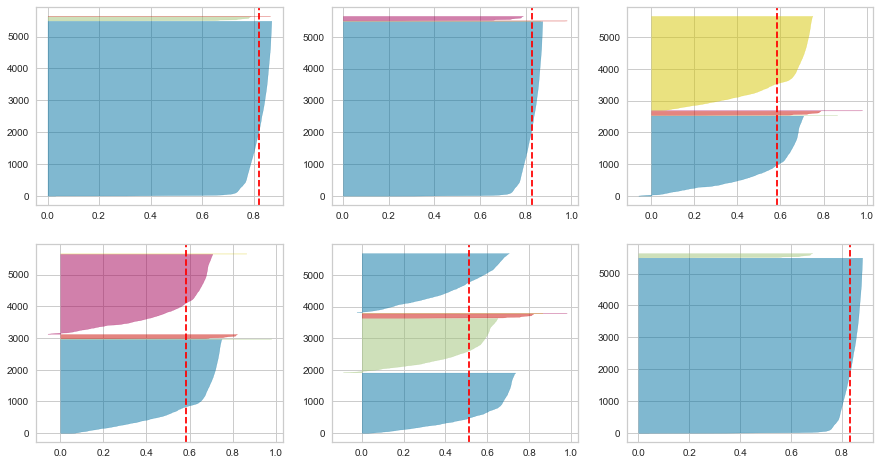

In [86]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_hierarchical)